In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [50]:
cancer = pd.read_csv('./input/data.csv')
cancer.drop(['id','Unnamed: 32'], axis=1, inplace=True)

In [56]:
cancer.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [20]:
cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [49]:
cancer.shape

(569, 31)

# 1. Column distribution by target

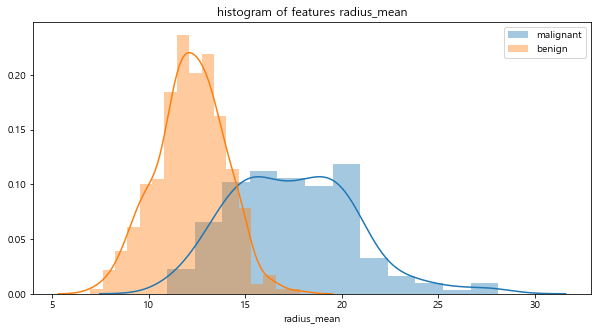

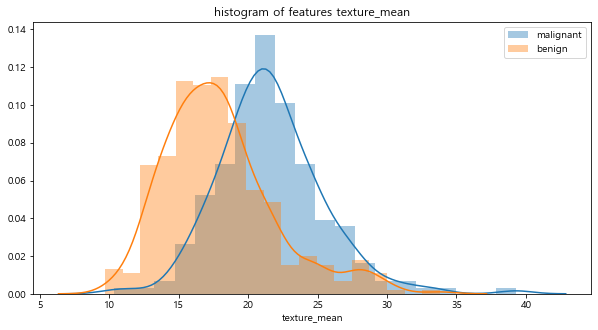

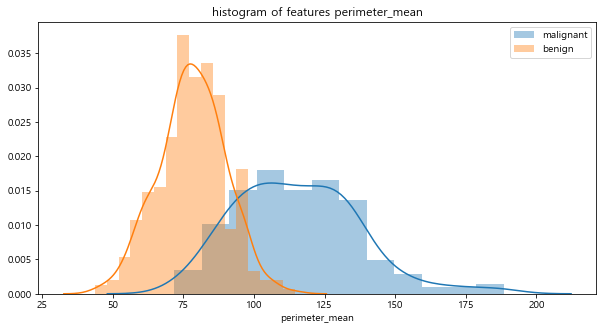

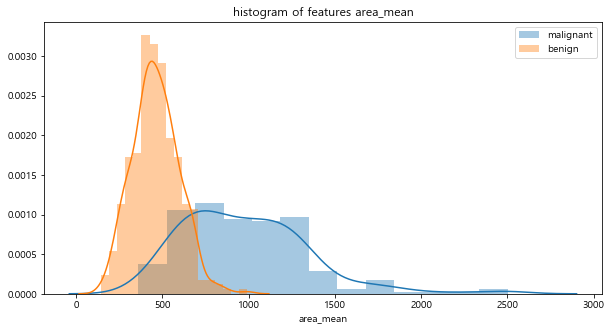

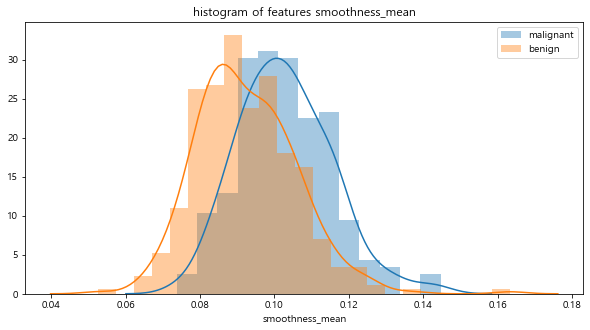

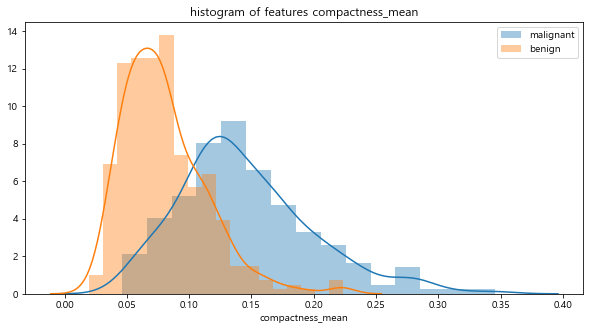

In [59]:
for cnt, col in enumerate(cancer):
    try:
        if cnt==0:
            continue
            
        plt.figure(figsize=(10, 5))
        sns.distplot(cancer[col][cancer['diagnosis']=='M'])
        sns.distplot(cancer[col][cancer['diagnosis']=='B'])
        plt.legend(['malignant','benign'], loc='best')
        plt.title('histogram of features '+str(col))
        plt.show()
        if cnt >= 6:
            break
    except Exception as e:
        pass

# 2. 2D plot

In [ ]:
X = cancer.drop(['diagnosis'], axis=1)
y = cancer['diagnosis']
scaler = StandardScaler()
cancer_scale = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

C:\Users\nonam\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nonam\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


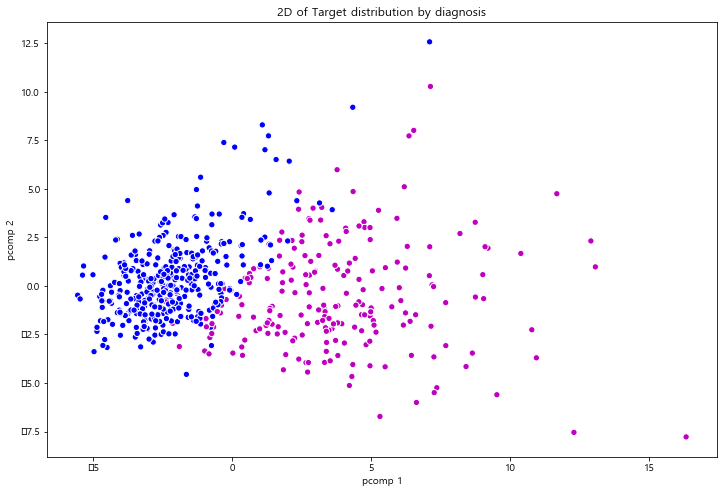

In [31]:
pca2 = PCA(n_components=2)
data_pca2 = pca2.fit_transform(cancer_scale)

plt.figure(figsize=(12, 8))
plt.scatter(data_pca2[:,0], data_pca2[:,1], c=cancer['diagnosis'], s=40, edgecolors='white')
plt.title("2D of Target distribution by diagnosis")
plt.xlabel('pcomp 1')
plt.ylabel('pcomp 2')
plt.show()

# 3. 3D plot

C:\Users\nonam\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\nonam\Miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


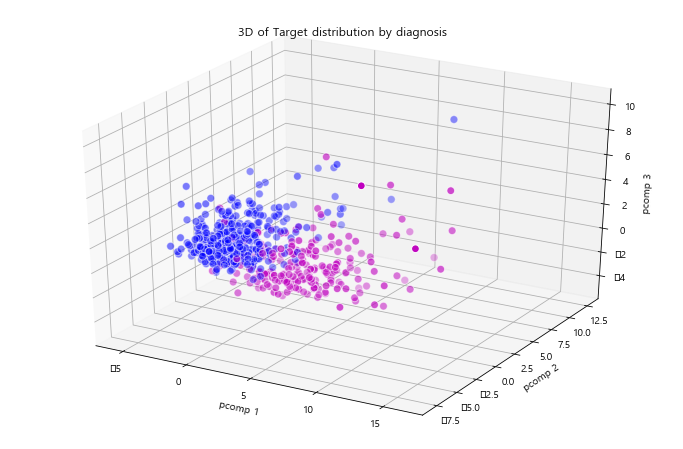

In [37]:
pca3 = PCA(n_components=3)
data_pca3 = pca3.fit_transform(cancer_scale)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pca3[:,0], data_pca3[:,1], data_pca3[:,2], c=cancer['diagnosis'], s=60, edgecolors='white')
ax.set_title('3D of Target distribution by diagnosis')
ax.set_xlabel('pcomp 1')
ax.set_ylabel('pcomp 2')
ax.set_zlabel('pcomp 3')
plt.show()


# 4. Corrleation

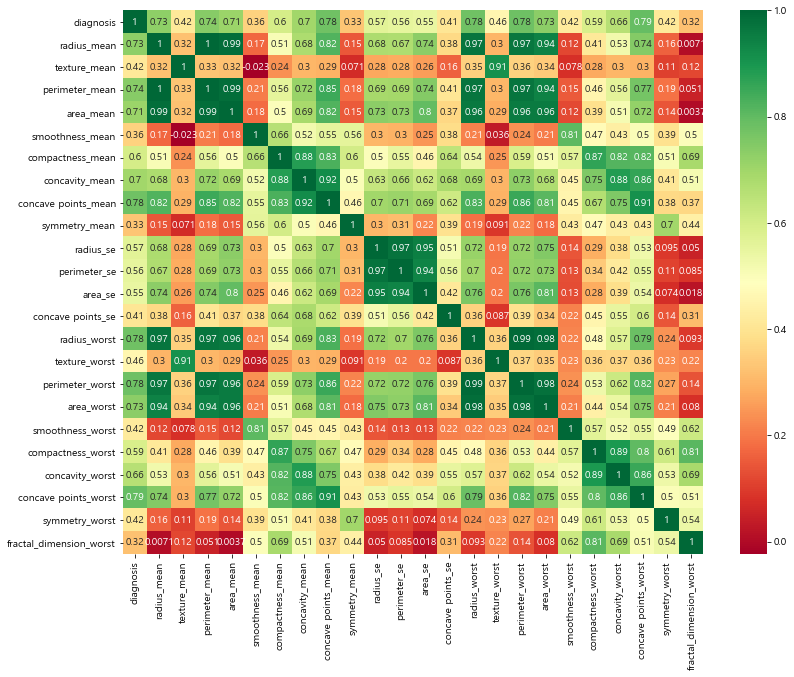

In [47]:
cancer_tmp = cancer.copy()
cancer_tmp['diagnosis'] = cancer['diagnosis'].replace({'M':1, 'B':0})
corrmat = cancer_tmp.corr()
top_corr_features = corrmat.index[abs(corrmat["diagnosis"])>=0.3]

plt.figure(figsize=(13,10))
g = sns.heatmap(cancer[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

# 5. Feature Importances

C:\Users\nonam\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


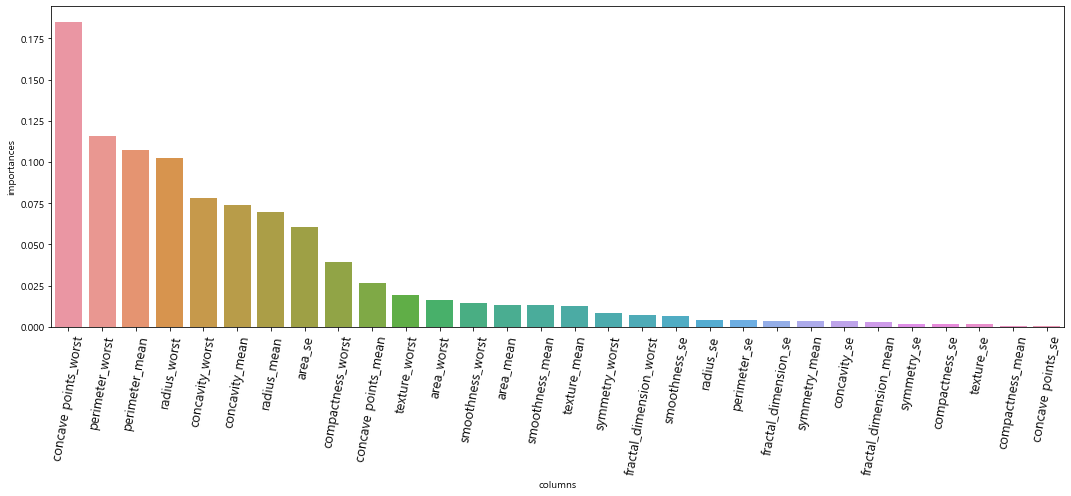

In [48]:
clf = RandomForestClassifier(random_state=42, max_depth=6)
clf.fit(X, y)
feature_importance = clf.feature_importances_

df_fi = pd.DataFrame({'columns':X.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()